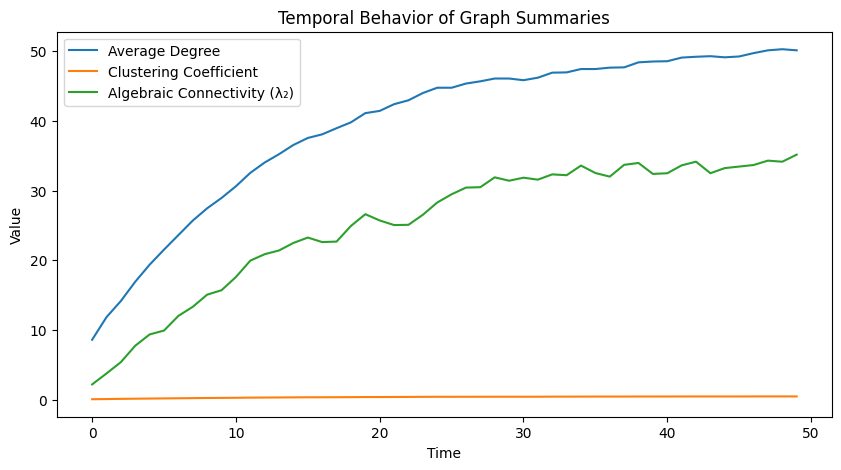

In [ ]:
# --- Basic setup ---
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

# --- Parameters ---
N = 100          # number of nodes
T = 50           # time steps
p_noise = 0.02   # probability of random edge flip per step

# --- Base graph: community structure ---
G = nx.stochastic_block_model(
    sizes=[50, 50],
    p=[[0.1, 0.01],
       [0.01, 0.1]]
)

# Containers for summaries
avg_degree = []
clustering = []
lambda2 = []   # algebraic connectivity

for t in range(T):
    # --- Introduce random temporal noise ---
    for _ in range(int(p_noise * N * N)):
        u, v = np.random.randint(0, N, size=2)
        if G.has_edge(u, v):
            G.remove_edge(u, v)
        else:
            G.add_edge(u, v)

    # --- Local summaries ---
    degrees = [d for _, d in G.degree()]
    avg_degree.append(np.mean(degrees))
    clustering.append(nx.average_clustering(G))

    # --- Spectral summary ---
    if nx.is_connected(G):
        L = nx.laplacian_matrix(G).toarray()
        eigvals = np.linalg.eigvalsh(L)
        lambda2.append(eigvals[1])  # second smallest eigenvalue
    else:
        lambda2.append(0.0)

# --- Plot ---
plt.figure(figsize=(10,5))
plt.plot(avg_degree, label="Average Degree")
plt.plot(clustering, label="Clustering Coefficient")
plt.plot(lambda2, label="Algebraic Connectivity (λ₂)")
plt.legend()
plt.xlabel("Time")
plt.ylabel("Value")
plt.title("Temporal Behavior of Graph Summaries")
plt.show()


Regime change at t=25: switched to Erdős–Rényi graph


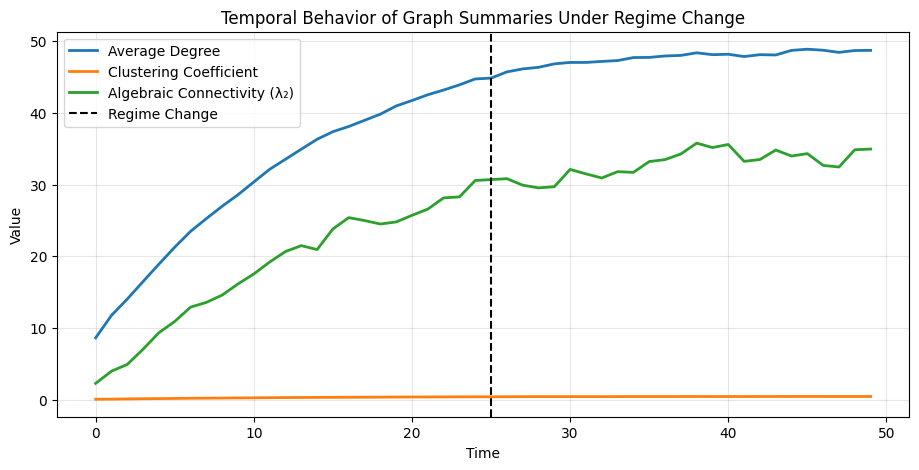

In [ ]:
# ==============================
# Streaming Graph Summary Study
# ==============================

import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

# ------------------------------
# Parameters
# ------------------------------
N = 100          # number of nodes
T = 50           # number of time steps
p_noise = 0.02   # random edge flip probability per step
regime_change_t = 25

# ------------------------------
# Initial Graph: Community Structure
# ------------------------------
G = nx.stochastic_block_model(
    sizes=[50, 50],
    p=[[0.1, 0.01],
       [0.01, 0.1]]
)

# ------------------------------
# Storage for summaries
# ------------------------------
avg_degree = []
clustering = []
lambda2 = []

# ------------------------------
# Streaming simulation
# ------------------------------
for t in range(T):

    # ---- Introduce random temporal noise ----
    for _ in range(int(p_noise * N * N)):
        u, v = np.random.randint(0, N, size=2)
        if u != v:
            if G.has_edge(u, v):
                G.remove_edge(u, v)
            else:
                G.add_edge(u, v)

    # ---- Regime change: destroy community structure ----
    if t == regime_change_t:
        current_avg_deg = np.mean([d for _, d in G.degree()])
        p = current_avg_deg / (N - 1)
        G = nx.erdos_renyi_graph(N, p)
        print(f"Regime change at t={t}: switched to Erdős–Rényi graph")

    # ---- Local summaries ----
    degrees = [d for _, d in G.degree()]
    avg_degree.append(np.mean(degrees))
    clustering.append(nx.average_clustering(G))

    # ---- Spectral summary ----
    if nx.is_connected(G):
        L = nx.laplacian_matrix(G).toarray()
        eigvals = np.linalg.eigvalsh(L)
        lambda2.append(eigvals[1])  # algebraic connectivity
    else:
        lambda2.append(0.0)

# ------------------------------
# Plot results
# ------------------------------
plt.figure(figsize=(11, 5))
plt.plot(avg_degree, label="Average Degree", linewidth=2)
plt.plot(clustering, label="Clustering Coefficient", linewidth=2)
plt.plot(lambda2, label="Algebraic Connectivity (λ₂)", linewidth=2)

plt.axvline(regime_change_t, color="black", linestyle="--", label="Regime Change")

plt.xlabel("Time")
plt.ylabel("Value")
plt.title("Temporal Behavior of Graph Summaries Under Regime Change")
plt.legend()
plt.grid(alpha=0.3)
plt.show()
